<a href="https://colab.research.google.com/github/FernandaSzAdr/KNN_cromossome/blob/master/TesteRede2_Binaria_Base2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [3]:
import os
import cv2
import csv
!pip install imutils
import imutils
from skimage import transform
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.optimizers import SGD
from keras.layers.core import Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from keras.callbacks import ModelCheckpoint
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import itertools
import matplotlib.pyplot as plt

In [0]:
train_path = 'drive/My Drive/Base_CNN/Binarizado2/Train'
test_path = 'drive/My Drive/Base_CNN/Binarizado2/Test'
validation_path = 'drive/My Drive/Base_CNN/Binarizado2/Validation'

In [0]:
def converte(regiao):
   regiao = np.array(regiao).astype('float32')/255
   regiao = transform.resize(regiao, (120, 120, 3))
   regiao = np.expand_dims(regiao, axis=0)
   return regiao


In [0]:
def ler_images_teste(arquiteture):
  y_true = []
  y_predict = []
  images_test = os.listdir(test_path)
  local = 'drive/My Drive/Base_CNN/Binarizado2/Resultado_Image/' + arquiteture
  if os.path.isdir(local) == False:
    os.mkdir(local)
  
  for img in images_test:
    # Pega cada imagem separadamente do folder de teste
    image = cv2.imread(test_path + '/' + img)
    f = open('drive/My Drive/Base_CNN/Binarizado2/posicoes_segmentada.csv', 'r')
    
    copia = image.copy()

    try:
      leitor = csv.reader(f)
      leitor = list(leitor)
      leitor.pop(0)
      for linha in leitor:
        if len(linha) > 0:
          # Para cada região dessa imagem:
          if linha[0] == img:
            posicoes = []
            x = int(linha[3])
            y = int(linha[4])
            w = int(linha[5])
            h = int(linha[6])
            
            # Label da região
            label = linha[1]
            if label == 'NC':
              y_true.append(1)
            else:
              y_true.append(0)
            
            # Região
            regiao = image[y: y + h, x: x + w]
            regiao = converte(regiao)
            
            # Coloca a região na função e obtem o resultado
            predicao = model.predict(regiao,batch_size=bSize,verbose=0)
            
            # Se é um cromossomo:
            if predicao[0][0] > predicao[0][1]:
              y_predict.append(0)
              cv2.rectangle(copia,(x, y),(x+w, y+h),(0,255,0), 1)
            # Se não for um cromossomo:
            else:
              y_predict.append(1)
              cv2.rectangle(copia,(x, y),(x+w, y+h),(0,0,255), 1)
                        
    finally:
      f.close()
    
    cv2.imwrite(local + '/' + img, copia)
  
  return y_true, y_predict




---



## Implementação



*   Batch size = 32
*   Image size = 120x120



In [0]:
results = {}

In [0]:
bSize = 32

In [0]:
datagen = ImageDataGenerator(rescale=1/255.)

In [10]:
train_batches = datagen.flow_from_directory(train_path, target_size=(120, 120), 
                                            classes=['C', 'NC'], 
                                            batch_size=bSize)
validation_batches = datagen.flow_from_directory(validation_path, 
                                                 target_size=(120, 120), 
                                                 classes=['C', 'NC'], 
                                                 batch_size=bSize)

Found 5675 images belonging to 2 classes.
Found 1509 images belonging to 2 classes.


In [0]:
stepsPerEpoche = len(train_batches)/bSize
validationSteps = len(validation_batches)/bSize



---



### 1 tentativa Accuracy: 80.36%


**Descrição**


*   Modelo descrito no artigo "Crowdsourcing for Chromosome Segmentation and Deep Classification"



In [0]:
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(120, 120, 3)),
    Conv2D(64, (3, 3), activation='relu'),
    Dropout(0.2),
    MaxPooling2D(pool_size=(2, 2)),
   
    Conv2D(32, (3, 3), activation='relu'),
    Conv2D(32, (3, 3), activation='relu'),
    Dropout(0.2),
    MaxPooling2D(pool_size=(2, 2)),
   
    Conv2D(16, (3, 3), activation='relu'),
    Conv2D(16, (3, 3), activation='relu'),
    Dropout(0.2),
    MaxPooling2D(pool_size=(2, 2)),
   
    Conv2D(8, (3, 3), activation='relu'),
    Conv2D(8, (3, 3), activation='relu'),
    Dropout(0.2),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(1024, activation='sigmoid'),
    Dense(512, activation='sigmoid'),
   
    Dense(2, activation='softmax')
]
)

In [0]:
model.compile(SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False), 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
arquiteture = 'architecture_1'

In [0]:
checkpointer = ModelCheckpoint(filepath='drive/My Drive/Resultado/weights_' + arquiteture + '.hdf5', verbose=1, save_best_only=True)

In [16]:
training = model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                   validation_data=validation_batches, validation_steps=validationSteps,
                   epochs=50, verbose=2, callbacks=[checkpointer])

Epoch 1/50
 - 77s - loss: 0.6711 - acc: 0.5677 - val_loss: 0.6894 - val_acc: 0.5938

Epoch 00001: val_loss improved from inf to 0.68935, saving model to drive/My Drive/Resultado/weights_architecture_1.hdf5
Epoch 2/50
 - 77s - loss: 0.6949 - acc: 0.5365 - val_loss: 0.6874 - val_acc: 0.5625

Epoch 00002: val_loss improved from 0.68935 to 0.68741, saving model to drive/My Drive/Resultado/weights_architecture_1.hdf5
Epoch 3/50
 - 73s - loss: 0.6861 - acc: 0.5677 - val_loss: 0.6136 - val_acc: 0.7188

Epoch 00003: val_loss improved from 0.68741 to 0.61360, saving model to drive/My Drive/Resultado/weights_architecture_1.hdf5
Epoch 4/50
 - 71s - loss: 0.6874 - acc: 0.6354 - val_loss: 0.6519 - val_acc: 0.6719

Epoch 00004: val_loss did not improve from 0.61360
Epoch 5/50
 - 75s - loss: 0.6988 - acc: 0.5833 - val_loss: 0.6772 - val_acc: 0.6094

Epoch 00005: val_loss did not improve from 0.61360
Epoch 6/50
 - 71s - loss: 0.6771 - acc: 0.6198 - val_loss: 0.6330 - val_acc: 0.6719

Epoch 00006: val_

In [0]:
model.load_weights('drive/My Drive/Resultado/weights_architecture_1.hdf5')

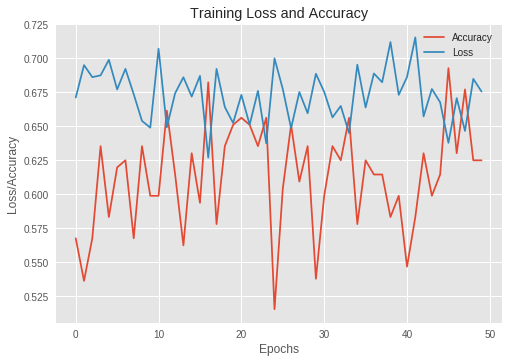

In [18]:
# plotar loss e accuracy para os datasets 'train' e 'test'
plt.style.use("ggplot")
plt.figure()
plt.plot(training.history['acc'], label='Accuracy')
plt.plot(training.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training Loss and Accuracy")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('drive/My Drive/Resultado/' + arquiteture + '.png', bbox_inches='tight')

In [19]:
y_true, y_predict = ler_images_teste(arquiteture)

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [20]:
results[arquiteture] = accuracy_score(y_true, y_predict)
print('Test Accuracy: {:.2f}%'.format(100 * results[arquiteture]))

Test Accuracy: 80.36%




---



### 2 tentativa Accuracy: 80.36%

**Descrição**


*   Modelo descrito no artigo "Crowdsourcing for Chromosome Segmentation and Deep Classification"
*   Alteração nas duas ultimas camadas Dense





In [0]:
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(120, 120, 3)),
    Conv2D(64, (3, 3), activation='relu'),
    Dropout(0.2),
    MaxPooling2D(pool_size=(2, 2)),
   
    Conv2D(32, (3, 3), activation='relu'),
    Conv2D(32, (3, 3), activation='relu'),
    Dropout(0.2),
    MaxPooling2D(pool_size=(2, 2)),
   
    Conv2D(16, (3, 3), activation='relu'),
    Conv2D(16, (3, 3), activation='relu'),
    Dropout(0.2),
    MaxPooling2D(pool_size=(2, 2)),
   
    Conv2D(8, (3, 3), activation='relu'),
    Conv2D(8, (3, 3), activation='relu'),
    Dropout(0.2),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(512, activation='relu'),
   
    Dense(2, activation='softmax')
]
)

In [0]:
model.compile(SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False), 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
arquiteture = 'architecture_2'

In [0]:
checkpointer = ModelCheckpoint(filepath='drive/My Drive/Resultado/weights_' + arquiteture + '.hdf5', verbose=1, save_best_only=True)

In [25]:
training = model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                   validation_data=validation_batches, validation_steps=validationSteps,
                   epochs=50, verbose=2, callbacks=[checkpointer])

Epoch 1/50
 - 2s - loss: 0.6927 - acc: 0.5469 - val_loss: 0.6908 - val_acc: 0.6406

Epoch 00001: val_loss improved from inf to 0.69084, saving model to drive/My Drive/Resultado/weights_architecture_2.hdf5
Epoch 2/50
 - 1s - loss: 0.6899 - acc: 0.6198 - val_loss: 0.6908 - val_acc: 0.5625

Epoch 00002: val_loss improved from 0.69084 to 0.69075, saving model to drive/My Drive/Resultado/weights_architecture_2.hdf5
Epoch 3/50
 - 1s - loss: 0.6834 - acc: 0.6719 - val_loss: 0.6828 - val_acc: 0.6406

Epoch 00003: val_loss improved from 0.69075 to 0.68284, saving model to drive/My Drive/Resultado/weights_architecture_2.hdf5
Epoch 4/50
 - 1s - loss: 0.6821 - acc: 0.6302 - val_loss: 0.6816 - val_acc: 0.6250

Epoch 00004: val_loss improved from 0.68284 to 0.68158, saving model to drive/My Drive/Resultado/weights_architecture_2.hdf5
Epoch 5/50
 - 1s - loss: 0.6759 - acc: 0.6562 - val_loss: 0.6787 - val_acc: 0.6250

Epoch 00005: val_loss improved from 0.68158 to 0.67868, saving model to drive/My Dri

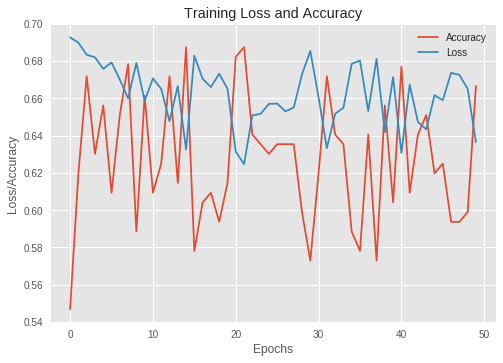

In [26]:
# plotar loss e accuracy para os datasets 'train' e 'test'
plt.style.use("ggplot")
plt.figure()
plt.plot(training.history['acc'], label='Accuracy')
plt.plot(training.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training Loss and Accuracy")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('drive/My Drive/Resultado/' + arquiteture + '.png', bbox_inches='tight')

In [27]:
y_true, y_predict = ler_images_teste(arquiteture)

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [28]:
results[arquiteture] = accuracy_score(y_true, y_predict)
print('Test Accuracy: {:.2f}%'.format(100 * results[arquiteture]))

Test Accuracy: 80.36%


### 3 tentativa Accuracy: 79.90%

Modelo criado pelo **Lucas Valentim**

https://github.com/lucasvalentim/chromosome-recognizer/blob/master/chromosome_recognizer.ipynb

In [0]:
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization
from keras.regularizers import l2

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4), 
                 input_shape=(None, None, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (1,1), kernel_regularizer=l2(1e-4)))
model.add(GlobalMaxPooling2D())

model.add(Dense(256, activation='relu', kernel_regularizer=l2(1e-4)))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid', kernel_regularizer=l2(1e-4)))

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
arquiteture = 'architecture_3'

In [0]:
checkpointer = ModelCheckpoint(filepath='drive/My Drive/Resultado/weights_' + arquiteture + '.hdf5', verbose=1, save_best_only=True)

In [33]:
training = model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                   validation_data=validation_batches, validation_steps=validationSteps,
                   epochs=50, verbose=2, callbacks=[checkpointer])

Epoch 1/50
 - 3s - loss: 1.9586 - acc: 0.5000 - val_loss: 0.8092 - val_acc: 0.5234

Epoch 00001: val_loss improved from inf to 0.80916, saving model to drive/My Drive/Resultado/weights_architecture_3.hdf5
Epoch 2/50
 - 1s - loss: 1.2905 - acc: 0.6094 - val_loss: 0.6314 - val_acc: 0.6953

Epoch 00002: val_loss improved from 0.80916 to 0.63142, saving model to drive/My Drive/Resultado/weights_architecture_3.hdf5
Epoch 3/50
 - 1s - loss: 0.9236 - acc: 0.6068 - val_loss: 0.6385 - val_acc: 0.7188

Epoch 00003: val_loss did not improve from 0.63142
Epoch 4/50
 - 1s - loss: 0.6904 - acc: 0.7083 - val_loss: 0.7850 - val_acc: 0.5625

Epoch 00004: val_loss did not improve from 0.63142
Epoch 5/50
 - 1s - loss: 0.6311 - acc: 0.7005 - val_loss: 0.5146 - val_acc: 0.8125

Epoch 00005: val_loss improved from 0.63142 to 0.51461, saving model to drive/My Drive/Resultado/weights_architecture_3.hdf5
Epoch 6/50
 - 1s - loss: 0.5532 - acc: 0.7656 - val_loss: 0.7941 - val_acc: 0.5078

Epoch 00006: val_loss d

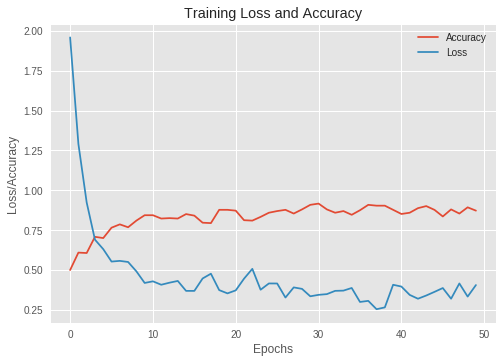

In [34]:
# plotar loss e accuracy para os datasets 'train' e 'test'
plt.style.use("ggplot")
plt.figure()
plt.plot(training.history['acc'], label='Accuracy')
plt.plot(training.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training Loss and Accuracy")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('drive/My Drive/Resultado/' + arquiteture + '.png', bbox_inches='tight')

In [35]:
y_true, y_predict = ler_images_teste(arquiteture)

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [36]:
results[arquiteture] = accuracy_score(y_true, y_predict)
print('Test Accuracy: {:.2f}%'.format(100 * results[arquiteture]))

Test Accuracy: 79.90%


### 4 tentativa Accuracy: 80.30%

Modelo adaptado do **Lucas Albertins**

*   Sem os **dropout**


In [0]:
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization
from keras.regularizers import l2

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4), 
                 input_shape=(None, None, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (1,1), kernel_regularizer=l2(1e-4)))
model.add(GlobalMaxPooling2D())

model.add(Dense(256, activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Dense(2, activation='sigmoid', kernel_regularizer=l2(1e-4)))

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
arquiteture = 'architecture_4'

In [0]:
checkpointer = ModelCheckpoint(filepath='drive/My Drive/Resultado/weights_' + arquiteture + '.hdf5', verbose=1, save_best_only=True)

In [41]:
training = model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                   validation_data=validation_batches, validation_steps=validationSteps,
                   epochs=50, verbose=2, callbacks=[checkpointer])

Epoch 1/50
 - 3s - loss: 0.6002 - acc: 0.7318 - val_loss: 1.1938 - val_acc: 0.6250

Epoch 00001: val_loss improved from inf to 1.19379, saving model to drive/My Drive/Resultado/weights_architecture_4.hdf5
Epoch 2/50
 - 1s - loss: 0.4849 - acc: 0.8229 - val_loss: 1.0196 - val_acc: 0.5469

Epoch 00002: val_loss improved from 1.19379 to 1.01962, saving model to drive/My Drive/Resultado/weights_architecture_4.hdf5
Epoch 3/50
 - 1s - loss: 0.4360 - acc: 0.8516 - val_loss: 1.1624 - val_acc: 0.6486

Epoch 00003: val_loss did not improve from 1.01962
Epoch 4/50
 - 1s - loss: 0.3982 - acc: 0.8464 - val_loss: 0.6334 - val_acc: 0.8125

Epoch 00004: val_loss improved from 1.01962 to 0.63339, saving model to drive/My Drive/Resultado/weights_architecture_4.hdf5
Epoch 5/50
 - 1s - loss: 0.3035 - acc: 0.9271 - val_loss: 0.7741 - val_acc: 0.7188

Epoch 00005: val_loss did not improve from 0.63339
Epoch 6/50
 - 1s - loss: 0.3342 - acc: 0.9010 - val_loss: 0.6244 - val_acc: 0.7109

Epoch 00006: val_loss i

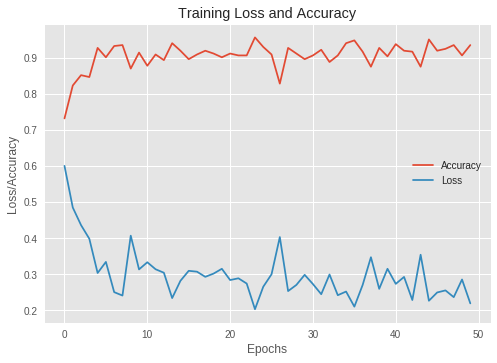

In [42]:
# plotar loss e accuracy para os datasets 'train' e 'test'
plt.style.use("ggplot")
plt.figure()
plt.plot(training.history['acc'], label='Accuracy')
plt.plot(training.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training Loss and Accuracy")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('drive/My Drive/Resultado/' + arquiteture + '.png', bbox_inches='tight')

In [43]:
y_true, y_predict = ler_images_teste(arquiteture)

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [44]:
results[arquiteture] = accuracy_score(y_true, y_predict)
print('Test Accuracy: {:.2f}%'.format(100 * results[arquiteture]))

Test Accuracy: 80.30%


### 5 tentativa Accuracy: 80.12%

Modelo adaptado do **Lucas Albertins**

*   Sem os **dropout**
*   Função **SGD** para compilação


In [0]:
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization
from keras.regularizers import l2

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4), 
                 input_shape=(None, None, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (1,1), kernel_regularizer=l2(1e-4)))
model.add(GlobalMaxPooling2D())

model.add(Dense(256, activation='relu', kernel_regularizer=l2(1e-4)))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid', kernel_regularizer=l2(1e-4)))

In [0]:
model.compile(SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False), 
              loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
arquiteture = 'architecture_5'

In [0]:
checkpointer = ModelCheckpoint(filepath='drive/My Drive/Resultado/weights_' + arquiteture + '.hdf5', verbose=1, save_best_only=True)

In [49]:
training = model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                   validation_data=validation_batches, validation_steps=validationSteps,
                   epochs=50, verbose=2, callbacks=[checkpointer])

Epoch 1/50
 - 3s - loss: 2.2279 - acc: 0.5312 - val_loss: 1.5258 - val_acc: 0.6250

Epoch 00001: val_loss improved from inf to 1.52580, saving model to drive/My Drive/Resultado/weights_architecture_5.hdf5
Epoch 2/50
 - 1s - loss: 1.8797 - acc: 0.5130 - val_loss: 0.8693 - val_acc: 0.5703

Epoch 00002: val_loss improved from 1.52580 to 0.86929, saving model to drive/My Drive/Resultado/weights_architecture_5.hdf5
Epoch 3/50
 - 1s - loss: 0.9866 - acc: 0.6458 - val_loss: 0.8823 - val_acc: 0.6641

Epoch 00003: val_loss did not improve from 0.86929
Epoch 4/50
 - 1s - loss: 0.8407 - acc: 0.6506 - val_loss: 0.6648 - val_acc: 0.6016

Epoch 00004: val_loss improved from 0.86929 to 0.66483, saving model to drive/My Drive/Resultado/weights_architecture_5.hdf5
Epoch 5/50
 - 1s - loss: 0.7257 - acc: 0.6927 - val_loss: 0.6051 - val_acc: 0.7344

Epoch 00005: val_loss improved from 0.66483 to 0.60514, saving model to drive/My Drive/Resultado/weights_architecture_5.hdf5
Epoch 6/50
 - 1s - loss: 0.8139 -

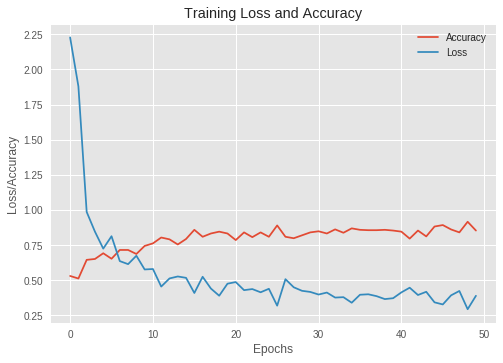

In [50]:
# plotar loss e accuracy para os datasets 'train' e 'test'
plt.style.use("ggplot")
plt.figure()
plt.plot(training.history['acc'], label='Accuracy')
plt.plot(training.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training Loss and Accuracy")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('drive/My Drive/Resultado/' + arquiteture + '.png', bbox_inches='tight')

In [51]:
y_true, y_predict = ler_images_teste(arquiteture)

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [52]:
results[arquiteture] = accuracy_score(y_true, y_predict)
print('Test Accuracy: {:.2f}%'.format(100 * results[arquiteture]))

Test Accuracy: 80.12%


### 6 tentativa Accuracy: 80.36%

Modelo adaptado do **Lucas Albertins**

*   Sem os **dropout**
*   Função **SGD** para compilação
*   **BatchNormalization** antes da ultima camada Dense


In [0]:
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization
from keras.regularizers import l2

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4), 
                 input_shape=(None, None, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (1,1), kernel_regularizer=l2(1e-4)))
model.add(GlobalMaxPooling2D())

model.add(Dense(256, activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Dense(2, activation='sigmoid', kernel_regularizer=l2(1e-4)))

In [0]:
model.compile(SGD(lr=0.03, momentum=0.0, decay=0.0, nesterov=False), 
              loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
arquiteture = 'architecture_6'

In [0]:
checkpointer = ModelCheckpoint(filepath='drive/My Drive/Resultado/weights_' + arquiteture + '.hdf5', verbose=1, save_best_only=True)

In [57]:
training = model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                   validation_data=validation_batches, validation_steps=validationSteps,
                   epochs=50, verbose=2, callbacks=[checkpointer])

Epoch 1/50
 - 3s - loss: 0.6404 - acc: 0.6771 - val_loss: 0.6157 - val_acc: 0.7188

Epoch 00001: val_loss improved from inf to 0.61569, saving model to drive/My Drive/Resultado/weights_architecture_6.hdf5
Epoch 2/50
 - 1s - loss: 0.4375 - acc: 0.8490 - val_loss: 0.3974 - val_acc: 0.8672

Epoch 00002: val_loss improved from 0.61569 to 0.39738, saving model to drive/My Drive/Resultado/weights_architecture_6.hdf5
Epoch 3/50
 - 1s - loss: 0.4285 - acc: 0.8385 - val_loss: 0.5488 - val_acc: 0.8125

Epoch 00003: val_loss did not improve from 0.39738
Epoch 4/50
 - 1s - loss: 0.4488 - acc: 0.8229 - val_loss: 1.1031 - val_acc: 0.7891

Epoch 00004: val_loss did not improve from 0.39738
Epoch 5/50
 - 1s - loss: 0.3984 - acc: 0.8724 - val_loss: 0.7973 - val_acc: 0.6953

Epoch 00005: val_loss did not improve from 0.39738
Epoch 6/50
 - 1s - loss: 0.3694 - acc: 0.8776 - val_loss: 0.8581 - val_acc: 0.6953

Epoch 00006: val_loss did not improve from 0.39738
Epoch 7/50
 - 1s - loss: 0.4003 - acc: 0.8542 

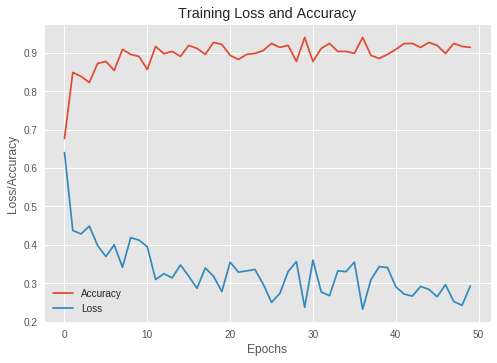

In [58]:
# plotar loss e accuracy para os datasets 'train' e 'test'
plt.style.use("ggplot")
plt.figure()
plt.plot(training.history['acc'], label='Accuracy')
plt.plot(training.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training Loss and Accuracy")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('drive/My Drive/Resultado/' + arquiteture + '.png', bbox_inches='tight')

In [59]:
y_true, y_predict = ler_images_teste(arquiteture)

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [60]:
results[arquiteture] = accuracy_score(y_true, y_predict)
print('Test Accuracy: {:.2f}%'.format(100 * results[arquiteture]))

Test Accuracy: 80.36%


### 7 tentativa Accuracy: 80.36%

Modelo adaptado do **Lucas Albertins**

*   Sem os **dropout**
*   Função **Adadelta** para compilação
*   **BatchNormalization** antes da ultima camada Dense


In [0]:
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization
from keras.regularizers import l2
from keras.optimizers import Adadelta

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4), 
                 input_shape=(None, None, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (1,1), kernel_regularizer=l2(1e-4)))
model.add(GlobalMaxPooling2D())

model.add(Dense(256, activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Dense(2, activation='sigmoid', kernel_regularizer=l2(1e-4)))

In [0]:
model.compile(Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0), 
              loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
arquiteture = 'architecture_7'

In [0]:
checkpointer = ModelCheckpoint(filepath='drive/My Drive/Resultado/weights_' + arquiteture + '.hdf5', verbose=1, save_best_only=True)

In [65]:
training = model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                   validation_data=validation_batches, validation_steps=validationSteps,
                   epochs=50, verbose=2, callbacks=[checkpointer])

Epoch 1/50
 - 4s - loss: 0.5079 - acc: 0.7943 - val_loss: 1.3232 - val_acc: 0.7500

Epoch 00001: val_loss improved from inf to 1.32323, saving model to drive/My Drive/Resultado/weights_architecture_7.hdf5
Epoch 2/50
 - 1s - loss: 0.3531 - acc: 0.8854 - val_loss: 0.7122 - val_acc: 0.7344

Epoch 00002: val_loss improved from 1.32323 to 0.71218, saving model to drive/My Drive/Resultado/weights_architecture_7.hdf5
Epoch 3/50
 - 1s - loss: 0.4409 - acc: 0.8438 - val_loss: 0.4438 - val_acc: 0.8125

Epoch 00003: val_loss improved from 0.71218 to 0.44378, saving model to drive/My Drive/Resultado/weights_architecture_7.hdf5
Epoch 4/50
 - 1s - loss: 0.3344 - acc: 0.8750 - val_loss: 0.4605 - val_acc: 0.8906

Epoch 00004: val_loss did not improve from 0.44378
Epoch 5/50
 - 1s - loss: 0.3323 - acc: 0.8854 - val_loss: 0.7504 - val_acc: 0.7422

Epoch 00005: val_loss did not improve from 0.44378
Epoch 6/50
 - 1s - loss: 0.4051 - acc: 0.8594 - val_loss: 0.6796 - val_acc: 0.7162

Epoch 00006: val_loss d

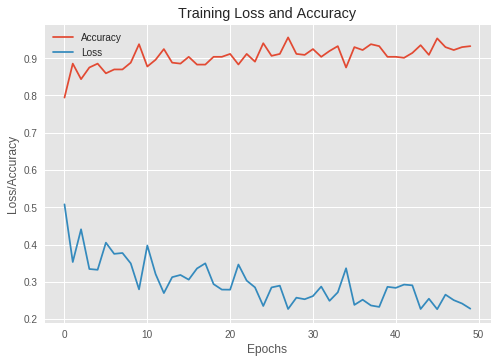

In [66]:
# plotar loss e accuracy para os datasets 'train' e 'test'
plt.style.use("ggplot")
plt.figure()
plt.plot(training.history['acc'], label='Accuracy')
plt.plot(training.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training Loss and Accuracy")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('drive/My Drive/Resultado/' + arquiteture + '.png', bbox_inches='tight')

In [67]:
y_true, y_predict = ler_images_teste(arquiteture)

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [68]:
results[arquiteture] = accuracy_score(y_true, y_predict)
print('Test Accuracy: {:.2f}%'.format(100 * results[arquiteture]))

Test Accuracy: 80.36%


### 8 tentativa Accuracy: 79.66% 

Modelo adaptado do **Lucas Albertins**

*   Função **Adadelta** para compilação


In [0]:
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization
from keras.regularizers import l2
from keras.optimizers import Adadelta

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4), 
                 input_shape=(None, None, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (1,1), kernel_regularizer=l2(1e-4)))
model.add(GlobalMaxPooling2D())

model.add(Dense(256, activation='relu', kernel_regularizer=l2(1e-4)))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid', kernel_regularizer=l2(1e-4)))

In [0]:
model.compile(Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0), 
              loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
arquiteture = 'architecture_8'

In [0]:
checkpointer = ModelCheckpoint(filepath='drive/My Drive/Resultado/weights_' + arquiteture + '.hdf5', verbose=1, save_best_only=True)

In [73]:
training = model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                   validation_data=validation_batches, validation_steps=validationSteps,
                   epochs=50, verbose=2, callbacks=[checkpointer])

Epoch 1/50
 - 4s - loss: 2.3035 - acc: 0.5562 - val_loss: 1.0998 - val_acc: 0.5469

Epoch 00001: val_loss improved from inf to 1.09977, saving model to drive/My Drive/Resultado/weights_architecture_8.hdf5
Epoch 2/50
 - 1s - loss: 1.2170 - acc: 0.6641 - val_loss: 0.7758 - val_acc: 0.5703

Epoch 00002: val_loss improved from 1.09977 to 0.77582, saving model to drive/My Drive/Resultado/weights_architecture_8.hdf5
Epoch 3/50
 - 1s - loss: 1.0140 - acc: 0.6250 - val_loss: 0.5433 - val_acc: 0.7656

Epoch 00003: val_loss improved from 0.77582 to 0.54325, saving model to drive/My Drive/Resultado/weights_architecture_8.hdf5
Epoch 4/50
 - 1s - loss: 0.7493 - acc: 0.6875 - val_loss: 0.7679 - val_acc: 0.5859

Epoch 00004: val_loss did not improve from 0.54325
Epoch 5/50
 - 1s - loss: 0.5868 - acc: 0.7578 - val_loss: 0.5201 - val_acc: 0.7578

Epoch 00005: val_loss improved from 0.54325 to 0.52011, saving model to drive/My Drive/Resultado/weights_architecture_8.hdf5
Epoch 6/50
 - 1s - loss: 0.9975 -

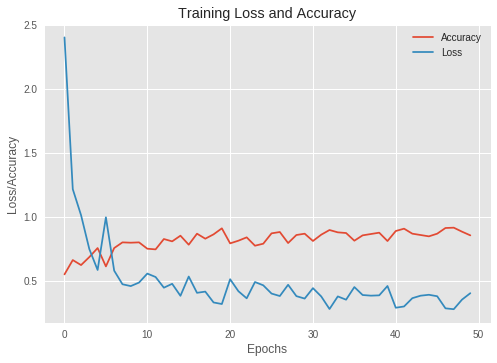

In [74]:
# plotar loss e accuracy para os datasets 'train' e 'test'
plt.style.use("ggplot")
plt.figure()
plt.plot(training.history['acc'], label='Accuracy')
plt.plot(training.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training Loss and Accuracy")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('drive/My Drive/Resultado/' + arquiteture + '.png', bbox_inches='tight')

In [75]:
y_true, y_predict = ler_images_teste(arquiteture)

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [76]:
results[arquiteture] = accuracy_score(y_true, y_predict)
print('Test Accuracy: {:.2f}%'.format(100 * results[arquiteture]))

Test Accuracy: 79.66%


### 9 tentativa Accuracy: 80.15%

Modelo adaptado do **Lucas Albertins**

*   Função **SGD** para compilação


In [0]:
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization
from keras.regularizers import l2

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4), 
                 input_shape=(None, None, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (1,1), kernel_regularizer=l2(1e-4)))
model.add(GlobalMaxPooling2D())

model.add(Dense(256, activation='relu', kernel_regularizer=l2(1e-4)))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid', kernel_regularizer=l2(1e-4)))

In [0]:
model.compile(SGD(lr=0.03, momentum=0.0, decay=0.0, nesterov=False), 
              loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
arquiteture = 'architecture_9'

In [0]:
checkpointer = ModelCheckpoint(filepath='drive/My Drive/Resultado/weights_' + arquiteture + '.hdf5', verbose=1, save_best_only=True)

In [81]:
training = model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                   validation_data=validation_batches, validation_steps=validationSteps,
                   epochs=50, verbose=2, callbacks=[checkpointer])

Epoch 1/50
 - 4s - loss: 4.7223 - acc: 0.5625 - val_loss: 5.7919 - val_acc: 0.5469

Epoch 00001: val_loss improved from inf to 5.79185, saving model to drive/My Drive/Resultado/weights_architecture_9.hdf5
Epoch 2/50
 - 1s - loss: 3.4873 - acc: 0.5807 - val_loss: 1.2979 - val_acc: 0.5469

Epoch 00002: val_loss improved from 5.79185 to 1.29794, saving model to drive/My Drive/Resultado/weights_architecture_9.hdf5
Epoch 3/50
 - 1s - loss: 0.9184 - acc: 0.5938 - val_loss: 0.6583 - val_acc: 0.6875

Epoch 00003: val_loss improved from 1.29794 to 0.65830, saving model to drive/My Drive/Resultado/weights_architecture_9.hdf5
Epoch 4/50
 - 1s - loss: 0.7309 - acc: 0.5885 - val_loss: 0.6920 - val_acc: 0.5781

Epoch 00004: val_loss did not improve from 0.65830
Epoch 5/50
 - 1s - loss: 0.8004 - acc: 0.5417 - val_loss: 0.6574 - val_acc: 0.7812

Epoch 00005: val_loss improved from 0.65830 to 0.65741, saving model to drive/My Drive/Resultado/weights_architecture_9.hdf5
Epoch 6/50
 - 1s - loss: 0.6385 -

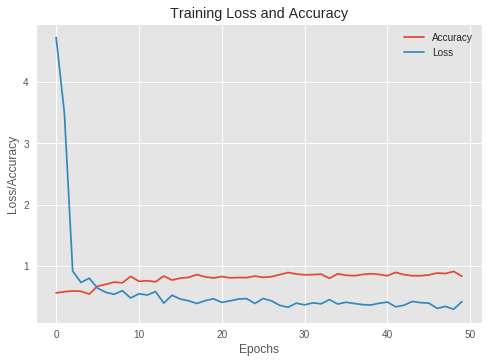

In [82]:
# plotar loss e accuracy para os datasets 'train' e 'test'
plt.style.use("ggplot")
plt.figure()
plt.plot(training.history['acc'], label='Accuracy')
plt.plot(training.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training Loss and Accuracy")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('drive/My Drive/Resultado/' + arquiteture + '.png', bbox_inches='tight')

In [83]:
y_true, y_predict = ler_images_teste(arquiteture)

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [84]:
results[arquiteture] = accuracy_score(y_true, y_predict)
print('Test Accuracy: {:.2f}%'.format(100 * results[arquiteture]))

Test Accuracy: 80.15%


### 10 tentativa Accuracy: 80.36%

Modelo adaptado do **Lucas Albertins**

*   Função **adam** para compilação
*   Adicionado mais 2 camadas convolutivas

In [0]:
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization
from keras.regularizers import l2

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4), 
                 input_shape=(None, None, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(96, (3, 3),activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(96, (3, 3),activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (1,1), kernel_regularizer=l2(1e-4)))
model.add(GlobalMaxPooling2D())

model.add(Dense(256, activation='relu', kernel_regularizer=l2(1e-4)))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid', kernel_regularizer=l2(1e-4)))

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
arquiteture = 'architecture_10'

In [0]:
checkpointer = ModelCheckpoint(filepath='drive/My Drive/Resultado/weights_' + arquiteture + '.hdf5', verbose=1, save_best_only=True)

In [89]:
training = model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                   validation_data=validation_batches, validation_steps=validationSteps,
                   epochs=50, verbose=2, callbacks=[checkpointer])

Epoch 1/50
 - 5s - loss: 1.7577 - acc: 0.5339 - val_loss: 0.6599 - val_acc: 0.6562

Epoch 00001: val_loss improved from inf to 0.65990, saving model to drive/My Drive/Resultado/weights_architecture_10.hdf5
Epoch 2/50
 - 1s - loss: 1.0249 - acc: 0.6328 - val_loss: 0.6795 - val_acc: 0.5938

Epoch 00002: val_loss did not improve from 0.65990
Epoch 3/50
 - 1s - loss: 0.8813 - acc: 0.6536 - val_loss: 0.5218 - val_acc: 0.8281

Epoch 00003: val_loss improved from 0.65990 to 0.52180, saving model to drive/My Drive/Resultado/weights_architecture_10.hdf5
Epoch 4/50
 - 1s - loss: 0.6140 - acc: 0.7344 - val_loss: 0.5121 - val_acc: 0.7891

Epoch 00004: val_loss improved from 0.52180 to 0.51208, saving model to drive/My Drive/Resultado/weights_architecture_10.hdf5
Epoch 5/50
 - 1s - loss: 0.5303 - acc: 0.7839 - val_loss: 0.6627 - val_acc: 0.7266

Epoch 00005: val_loss did not improve from 0.51208
Epoch 6/50
 - 1s - loss: 0.5726 - acc: 0.7812 - val_loss: 0.4495 - val_acc: 0.8594

Epoch 00006: val_los

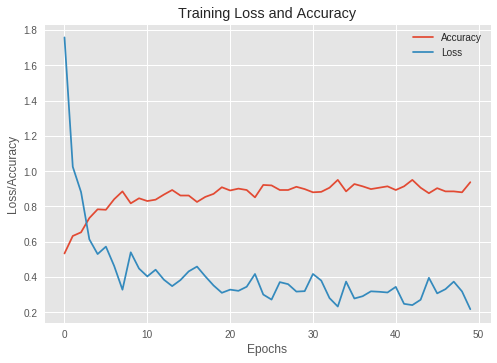

In [90]:
# plotar loss e accuracy para os datasets 'train' e 'test'
plt.style.use("ggplot")
plt.figure()
plt.plot(training.history['acc'], label='Accuracy')
plt.plot(training.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training Loss and Accuracy")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('drive/My Drive/Resultado/' + arquiteture + '.png', bbox_inches='tight')

In [91]:
y_true, y_predict = ler_images_teste(arquiteture)

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [92]:
results[arquiteture] = accuracy_score(y_true, y_predict)
print('Test Accuracy: {:.2f}%'.format(100 * results[arquiteture]))

Test Accuracy: 80.36%


### 11 tentativa Accuracy: 80.36%

Modelo adaptado do **Lucas Albertins**

*   Função **SGD** para compilação
*   Adicionado mais 2 camadas convolutivas

In [0]:
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization
from keras.regularizers import l2

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4), 
                 input_shape=(None, None, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(96, (3, 3),activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(96, (3, 3),activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (1,1), kernel_regularizer=l2(1e-4)))
model.add(GlobalMaxPooling2D())

model.add(Dense(256, activation='relu', kernel_regularizer=l2(1e-4)))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid', kernel_regularizer=l2(1e-4)))

In [0]:
model.compile(SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False), 
              loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
arquiteture = 'architecture_11'

In [0]:
checkpointer = ModelCheckpoint(filepath='drive/My Drive/Resultado/weights_' + arquiteture + '.hdf5', verbose=1, save_best_only=True)

In [97]:
training = model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                   validation_data=validation_batches, validation_steps=validationSteps,
                   epochs=50, verbose=2, callbacks=[checkpointer])

Epoch 1/50
 - 5s - loss: 1.8679 - acc: 0.5365 - val_loss: 0.9108 - val_acc: 0.7027

Epoch 00001: val_loss improved from inf to 0.91079, saving model to drive/My Drive/Resultado/weights_architecture_11.hdf5
Epoch 2/50
 - 1s - loss: 1.5559 - acc: 0.5417 - val_loss: 0.6903 - val_acc: 0.6406

Epoch 00002: val_loss improved from 0.91079 to 0.69032, saving model to drive/My Drive/Resultado/weights_architecture_11.hdf5
Epoch 3/50
 - 1s - loss: 1.2198 - acc: 0.5469 - val_loss: 0.6594 - val_acc: 0.7109

Epoch 00003: val_loss improved from 0.69032 to 0.65941, saving model to drive/My Drive/Resultado/weights_architecture_11.hdf5
Epoch 4/50
 - 1s - loss: 1.0842 - acc: 0.5599 - val_loss: 0.7648 - val_acc: 0.5938

Epoch 00004: val_loss did not improve from 0.65941
Epoch 5/50
 - 1s - loss: 0.8187 - acc: 0.6615 - val_loss: 0.6021 - val_acc: 0.7422

Epoch 00005: val_loss improved from 0.65941 to 0.60210, saving model to drive/My Drive/Resultado/weights_architecture_11.hdf5
Epoch 6/50
 - 1s - loss: 0.74

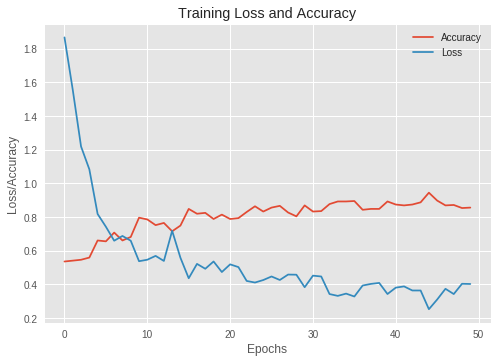

In [98]:
# plotar loss e accuracy para os datasets 'train' e 'test'
plt.style.use("ggplot")
plt.figure()
plt.plot(training.history['acc'], label='Accuracy')
plt.plot(training.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training Loss and Accuracy")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('drive/My Drive/Resultado/' + arquiteture + '.png', bbox_inches='tight')

In [99]:
y_true, y_predict = ler_images_teste(arquiteture)

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [100]:
results[arquiteture] = accuracy_score(y_true, y_predict)
print('Test Accuracy: {:.2f}%'.format(100 * results[arquiteture]))

Test Accuracy: 80.36%


### 12 tentativa Accuracy: 80.15%

Modelo adaptado do **Lucas Albertins**

*   Sem utilização das funções de regularização
*   Função **SGD** para compilação
*   Adicionado mais 2 camadas convolutivas

In [0]:
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization
from keras.regularizers import l2

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu',input_shape=(None, None, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(96, (3, 3),activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(96, (3, 3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (1,1)))
model.add(GlobalMaxPooling2D())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))

In [0]:
model.compile(SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False), 
              loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
arquiteture = 'architecture_12'

In [0]:
checkpointer = ModelCheckpoint(filepath='drive/My Drive/Resultado/weights_' + arquiteture + '.hdf5', verbose=1, save_best_only=True)

In [105]:
training = model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                   validation_data=validation_batches, validation_steps=validationSteps,
                   epochs=50, verbose=2, callbacks=[checkpointer])

Epoch 1/50
 - 5s - loss: 1.6287 - acc: 0.4974 - val_loss: 0.8824 - val_acc: 0.4531

Epoch 00001: val_loss improved from inf to 0.88238, saving model to drive/My Drive/Resultado/weights_architecture_12.hdf5
Epoch 2/50
 - 1s - loss: 1.1796 - acc: 0.5703 - val_loss: 0.6158 - val_acc: 0.7344

Epoch 00002: val_loss improved from 0.88238 to 0.61577, saving model to drive/My Drive/Resultado/weights_architecture_12.hdf5
Epoch 3/50
 - 1s - loss: 1.1686 - acc: 0.5859 - val_loss: 0.6608 - val_acc: 0.5547

Epoch 00003: val_loss did not improve from 0.61577
Epoch 4/50
 - 1s - loss: 0.7947 - acc: 0.6224 - val_loss: 0.8727 - val_acc: 0.4453

Epoch 00004: val_loss did not improve from 0.61577
Epoch 5/50
 - 1s - loss: 0.8261 - acc: 0.6016 - val_loss: 0.6243 - val_acc: 0.7656

Epoch 00005: val_loss did not improve from 0.61577
Epoch 6/50
 - 1s - loss: 0.7019 - acc: 0.6615 - val_loss: 0.6559 - val_acc: 0.6016

Epoch 00006: val_loss did not improve from 0.61577
Epoch 7/50
 - 1s - loss: 0.7826 - acc: 0.594

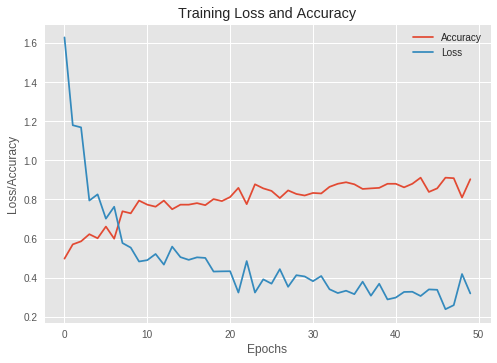

In [106]:
# plotar loss e accuracy para os datasets 'train' e 'test'
plt.style.use("ggplot")
plt.figure()
plt.plot(training.history['acc'], label='Accuracy')
plt.plot(training.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training Loss and Accuracy")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('drive/My Drive/Resultado/' + arquiteture + '.png', bbox_inches='tight')

In [107]:
y_true, y_predict = ler_images_teste(arquiteture)

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [108]:
results[arquiteture] = accuracy_score(y_true, y_predict)
print('Test Accuracy: {:.2f}%'.format(100 * results[arquiteture]))

Test Accuracy: 80.15%
